# Exploratory data analysis and modelling

First, we will look at the distributions of features and relationships between them. 
After that we split the data, fit and optimize models and lastly sum up the results.


In [255]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')


In [256]:
# import cleaned dataset
df = pd.read_csv('data/dataset_cleaned.csv')
# drop index column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [257]:
# if value is 0 or 'missing', replace with NaN
df = df.replace(0, np.nan)
df = df.replace('missing', np.nan)

# drop columns with more than 50% missing values
df.dropna(thresh=len(df)*0.25, axis=1, inplace=True)


In [258]:
# see the statictical summary of the numerical columns
df.describe().round(0)


,Price,SurfaceArea,YearBuilt,TotalFloorsInBuilding,YearRenovated,TotalRooms,LandArea
count,1985.000,1398.000,1896.000,579.000,742.000,736.000,516.000
mean,247817.000,144.000,1966.000,4.000,2010.000,5.000,487.000
std,178323.000,110.000,58.000,3.000,14.000,2.000,256.000
min,1.000,1.000,1500.000,1.000,1900.000,1.000,1.000
25%,125000.000,71.000,1953.000,2.000,2005.000,3.000,296.000
50%,196000.000,110.000,1979.000,3.000,2013.000,5.000,464.000
75%,320000.000,182.000,2006.000,5.000,2019.000,6.000,686.000
max,999999.000,889.000,2024.000,21.000,2022.000,10.000,999.000


In [259]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  1985 non-null   int64  
 1   SurfaceArea            1398 non-null   float64
 2   ApartmentType          792 non-null    object 
 3   YearBuilt              1896 non-null   float64
 4   ApartmentSetting       523 non-null    object 
 5   TotalFloorsInBuilding  579 non-null    float64
 6   YearRenovated          742 non-null    float64
 7   BalconyTerraceAtrium   705 non-null    object 
 8   Furniture              706 non-null    object 
 9   NetArea                1194 non-null   object 
 10  EnergyClass            924 non-null    object 
 11  TotalRooms             736 non-null    float64
 12  HouseMaterial          548 non-null    object 
 13  HouseType              1061 non-null   object 
 14  LandArea               516 non-null    float64
 15  Regi

Price
SurfaceArea
ApartmentType


<AxesSubplot:xlabel='ApartmentType', ylabel='Count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

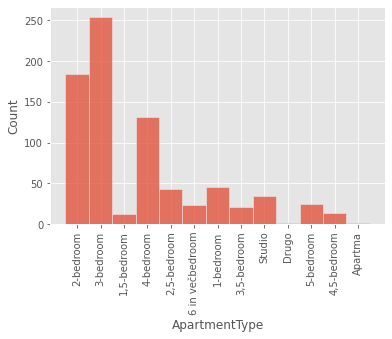

YearBuilt
ApartmentSetting


<AxesSubplot:xlabel='ApartmentSetting', ylabel='Count'>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

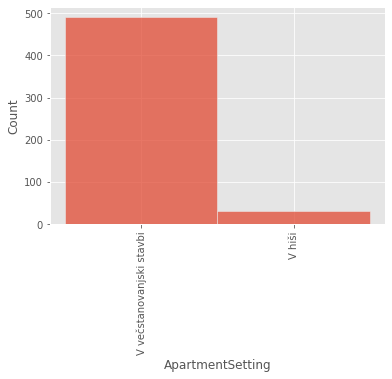

TotalFloorsInBuilding
YearRenovated
BalconyTerraceAtrium


<AxesSubplot:xlabel='BalconyTerraceAtrium', ylabel='Count'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

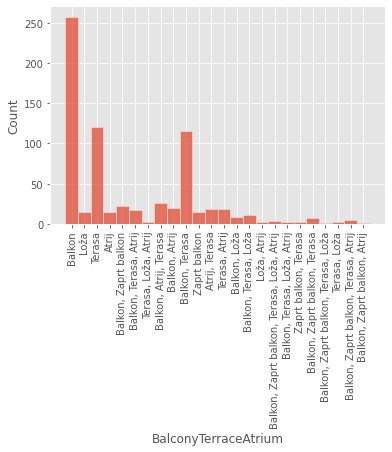

Furniture


<AxesSubplot:xlabel='Furniture', ylabel='Count'>

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

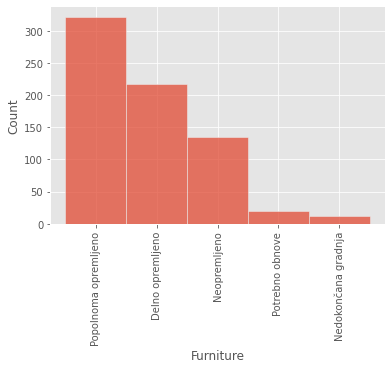

NetArea
EnergyClass
TotalRooms
HouseMaterial


<AxesSubplot:xlabel='HouseMaterial', ylabel='Count'>

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

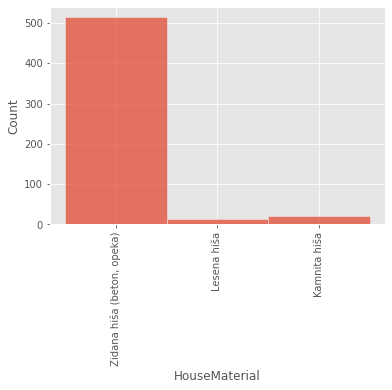

HouseType


<AxesSubplot:xlabel='HouseType', ylabel='Count'>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

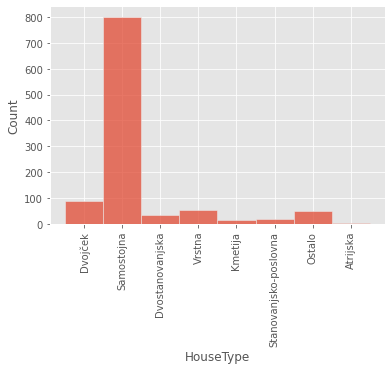

LandArea
Region


<AxesSubplot:xlabel='Region', ylabel='Count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

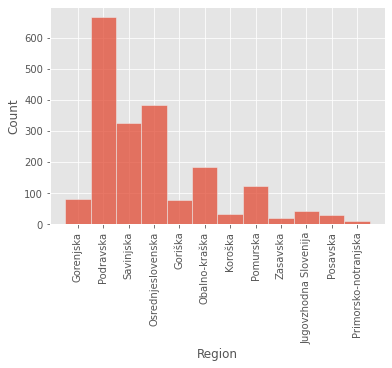

District
Neighborhood


<Figure size 432x288 with 0 Axes>

In [260]:
for label in df.columns:
  print(label)
  if(df[label].dtype == 'object') and (len(list(df[label].unique())) <= 25):
    sns.histplot(data=df, x=label)
    # set labels
    plt.xticks(rotation = '90')
    #plt.tight_layout()
    # save img
    plt.rcParams.update({
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})

    plt.savefig('histogram_' + label + '.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.clf()

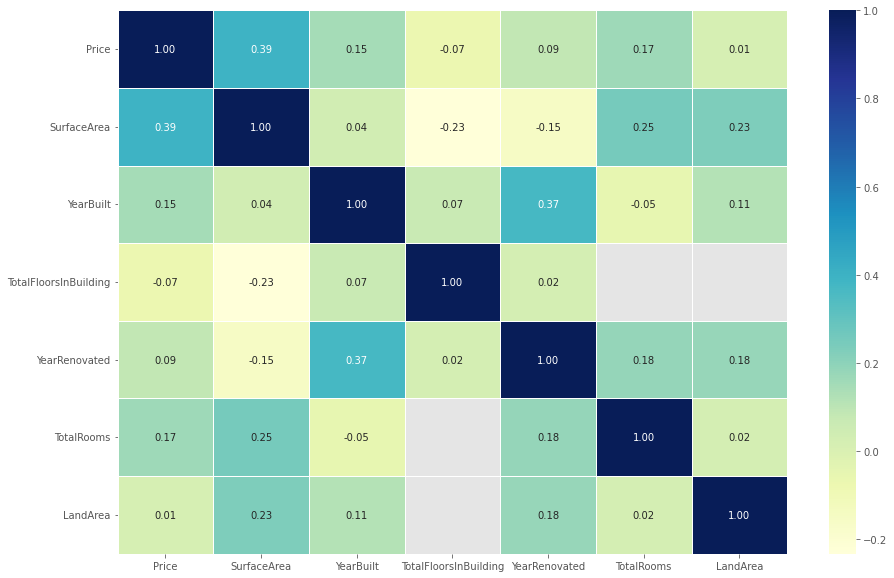

In [261]:
# create a correlation matrix
corr_matrix = df.corr()

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                  annot=True,
                  linewidths=0.5,
                  fmt=".2f",
                  cmap="YlGnBu");
                    

In [262]:
# average price per m2
df['PricePerM2'] = df['Price'] / df['SurfaceArea'].round(0)
df['PricePerM2'].describe().round(0)


count     1398.000
mean      2368.000
std       8072.000
min          0.000
25%       1082.000
50%       1861.000
75%       2877.000
max     299000.000
Name: PricePerM2, dtype: float64

<AxesSubplot:xlabel='Price'>

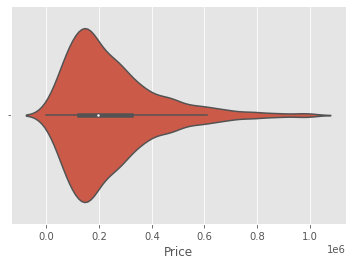

In [263]:
# plot price distribution
sns.violinplot(data=df, x='Price')



In [264]:
# count how many values for price are above 1 mio
df[df['Price'] > 1000000].shape[0]

0

<AxesSubplot:xlabel='SurfaceArea', ylabel='Price'>

<AxesSubplot:xlabel='SurfaceArea', ylabel='Price'>

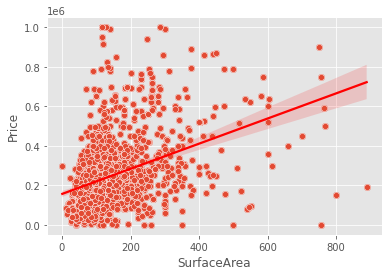

In [265]:
# scaterplot price and surface area with a regression line
sns.regplot(data=df, x='SurfaceArea', y='Price', line_kws={'color': 'red'})
sns.scatterplot(data=df, x='SurfaceArea', y='Price')

<AxesSubplot:xlabel='SurfaceArea', ylabel='Price'>

<AxesSubplot:xlabel='SurfaceArea', ylabel='Price'>

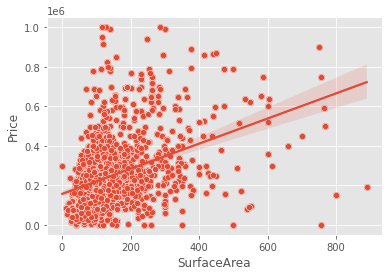

In [266]:
# regression and scatteršplot for price and surface area
sns.regplot(data=df, x='SurfaceArea', y='Price')
sns.scatterplot(data=df, x='SurfaceArea', y='Price')
# set labels


In [267]:
# delete dataset 
del df

# read in dataset
df = pd.read_csv('data/dataset_cleaned.csv')
# drop index column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Encode data, split dataframe and fit models

In [268]:
# import the models, metrics and cross validation
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
np.set_printoptions(precision=4)
import time

In [269]:
train, test = train_test_split(df, test_size=0.2, random_state = 42)

In [270]:
# impute categorical columns with LabelEncoder
def ImputeCategoricalFeatures(df):
    # Find the columns of object type along with their column index
    object_cols = list(df.select_dtypes(exclude=[np.int64,np.float64]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))

    # Encode the categorical columns with numbers
    label_enc = LabelEncoder()
    encoders = {}
    
    
    for i in object_cols_ind:
        df.iloc[:,i] = label_enc.fit_transform(df.iloc[:,i])
        encoders[i] = label_enc
    return df

In [271]:
train_imp = ImputeCategoricalFeatures(train)
test_imp = ImputeCategoricalFeatures(test)

In [272]:
# split the data into X and y
X_train = train_imp.drop('Price', axis =1)
y_train = np.ravel(np.array(train_imp[['Price']]))
X_test = test_imp.drop('Price', axis =1)
y_test = np.ravel(np.array(test_imp[['Price']]))

In [273]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1588, 21)
(1588,)
(397, 21)
(397,)


In [374]:
# define the valuation metrics
# mae
def mse(y_test, y_preds):
    return -mean_squared_error(y_test, y_preds)

# rmse
def rmse(y_test, y_preds):
    return -np.sqrt(mean_squared_error(y_test, y_preds))

# rmsle
def rmsle(y_test, y_preds):
    return -np.sqrt(mean_squared_error(np.log(abs(y_test)), np.log(abs(y_preds))))

# mape
def mape(y_test, y_preds):
    return -np.mean(np.abs((y_test - y_preds) / y_test)) * 100

# R2
def r2(y_test, y_preds):
    return r2_score(y_test, y_preds)




In [275]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [294]:
# make a dict with all metrics
metrics = {'mse': mse,
            'rmse': rmse,
            'rmsle': rmsle,
            'mape': mape,
            'r2': r2}
            

In [354]:
# set each model to use 5 fold cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# make a dict with all models with using cross validation
models = {'LinearRegression': LinearRegression(),
          'DecisionTreeRegressor': DecisionTreeRegressor(),
          'BaggingRegressor': BaggingRegressor(),
          'RandomForestRegressor': RandomForestRegressor(),
          'AdaBoostRegressor': AdaBoostRegressor(),
          'GradientBoostingRegressor': GradientBoostingRegressor(),
          }



In [327]:
# create a function to fit on train data and time how long it takes for each model to fit

def fit_and_time(models, X_train, X_test):
    # set random seed
    np.random.seed(42)

    # make a dict of times for each model
    model_times = {}
    # loop through models
    for name, model in models.items():
        
        # fit the model
        start = time.time()
        model.fit(X_train, y_train)
        time_taken =  time.time() - start
    

        print(name +' completed in: ' + str(time_taken) + ' seconds')

        # add time in a dictionary
        model_times[name] = time_taken
    # return the dictionary in a dataframe
    return pd.DataFrame(model_times, index=['0'])
    


In [335]:
# evaluate each model with every metricon both train and test data
def evaluate(models, X_train,y_train, X_test, y_test, metrics):
    # set random seed
    np.random.seed(42)

    # make a dict for each metric
    model_metrics = {}
    # loop through metrics
    for name, metric in metrics.items():
        # make a dict for each model
        model_metrics[name] = {}
        # loop through models
        for model_name, model in models.items():
            # fit the model
            model.fit(X_train, y_train)
            # make predictions for train data
            y_preds_train = model.predict(X_train)
            y_preds_test = model.predict(X_test)
            # evaluate the model
            model_metrics[name][model_name + '_train'] = metric(y_train, y_preds_train)

            # make predictions for test data
            
            # evaluate the model
            model_metrics[name][model_name + '_test'] = metric(y_test, y_preds_test)
            
    # return the dictionary in a dataframe
    return pd.DataFrame(model_metrics)

In [351]:
# for each model make an array of predictions and test data
def predictions(models, X_train, y_train, X_test, y_test, train=True):
    # set random seed
    np.random.seed(42)

    # make a dict for each metric
    model_predictions = {}
    # loop through metrics
    for model_name, model in models.items():
        # fit the model
        model.fit(X_train, y_train)
        # make predictions for train data
        y_preds_train = model.predict(X_train).round(0).astype(int)
        y_preds_test = model.predict(X_test).round(0).astype(int)
        # evaluate the model
        if train:
            model_predictions['True_values'] = y_train
            model_predictions[model_name + '_train'] = y_preds_train
        else:
            model_predictions['True_values'] = y_test
            model_predictions[model_name + '_test'] = y_preds_test
    # return the dictionary in a dataframe
    return pd.DataFrame(model_predictions)

In [344]:
model_times = fit_and_time(models, X_train, y_train)
model_scores = evaluate(models, X_train, y_train, X_test, y_test, metrics)

Linear Regression completed in: 0.004001617431640625 seconds
Decision Tree completed in: 0.009997129440307617 seconds
Bagging completed in: 0.0670018196105957 seconds
Random Forest completed in: 0.5879991054534912 seconds
AdaBoost completed in: 0.02899956703186035 seconds
Gradient Boosting completed in: 0.18899917602539062 seconds


In [392]:
predictions = predictions(models, X_train, y_train, X_test, y_test, train=False)
predictions


TypeError: 'DataFrame' object is not callable

In [388]:
# make a function that performs cross validation on each model
def cross_val(models, X_train, y_train):
    # set random seed
    np.random.seed(42)

    # make a dict for each metric
    model_cross_val = {}
    # loop through metrics
    for model_name, model in models.items():
        # fit the model
        model_cross_val[model_name] = np.mean(cross_val_score(model, X_train, y_train, cv=3,scoring='r2', n_jobs=-1))
    # return the dictionary in a dataframe
    return pd.DataFrame(model_cross_val, index=['0'])

In [389]:

cross_val = cross_val(models, X_train, y_train)
cross_val

,LinearRegression,DecisionTreeRegressor,BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
0,0.161,0.013,0.420,0.454,0.205,0.477


In [390]:
# make charts for the model scores on the test set

def plot_model_scores(model_scores):
    model_scores.plot(kind='bar', figsize=(10, 8))
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()


In [391]:
# plot the model scores
plot_model_scores(evaluate(models, X_train, X_test, metrics))

TypeError: evaluate() missing 2 required positional arguments: 'y_test' and 'metrics'

In [ ]:
import shap

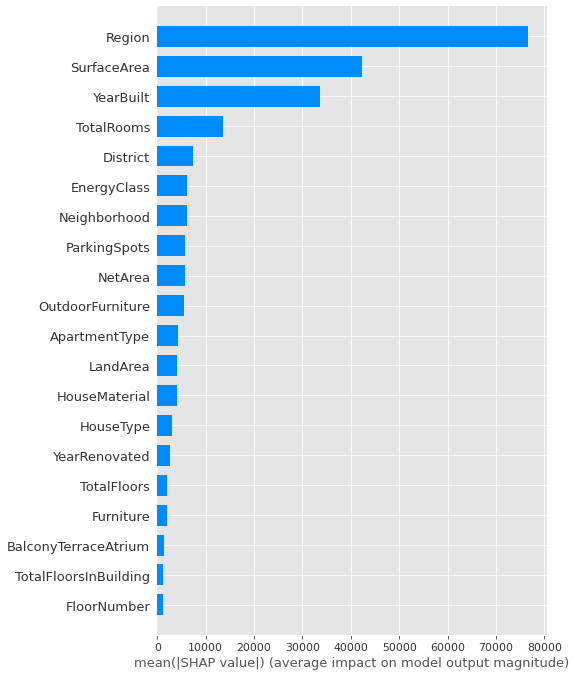

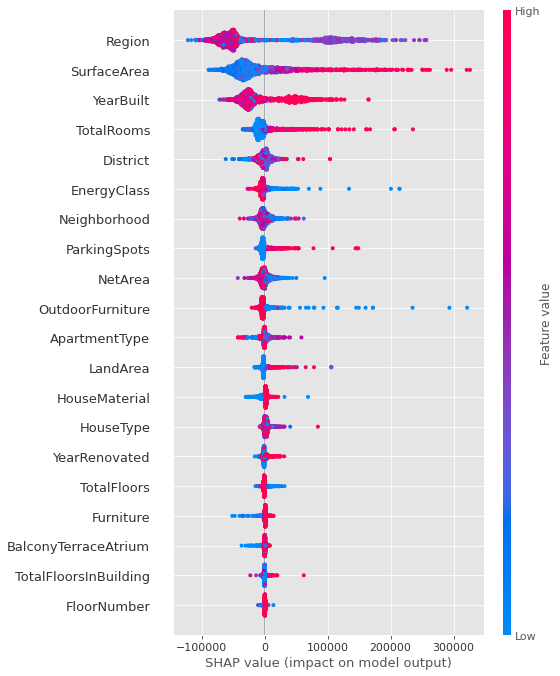

In [334]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
shap.summary_plot(shap_values, X_train, plot_type="dot")

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
%%time
xgboost_model = XGBRegressor(#learning_rate=0.01,
                         #n_estimators=1000,
                         #max_depth=4, min_child_weight=1,
                         #gamma=0.6, subsample=0.7,
                         #colsample_bytree=0.2,
                         #nthread=-1,
                         #scale_pos_weight=1, seed=27,
                         #reg_alpha=0.001
                       )

kf = KFold(n_splits=5)
y_pred_xgboost = cross_val_score(xgboost_model, X_train, y_train, cv=kf, n_jobs=-1)
print(y_pred_xgboost.mean())
print(y_pred_xgboost)

In [ ]:
%%time
xgboost_model.fit(X_train, y_train)

y_train_pred_xgboost = xgboost_model.predict(X_train)
print('train RMSLE: ' + str(rmsle(y_train, y_train_pred_xgboost)))

y_test_pred_xgboost = xgboost_model.predict(X_test)
print('test RMSLE: ' + str(rmsle(y_test, y_test_pred_xgboost)))

In [393]:
from sklearn.model_selection import GridSearchCV


In [406]:
param_grid = [
{ 'max_features': [2, 4, 6, 8]},
]


In [409]:
for  model in      [         DecisionTreeRegressor(), BaggingRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]:
    grid_search = GridSearchCV(model, param_grid, cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True)
    grid_search.fit(X_train, y_train)

    print(grid_search.best_estimator_)
    print(grid_search.best_score_)
    print(grid_search.best_index_)
    print(grid_search.cv_results_)
    

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8]}],
             return_train_score=True, scoring='neg_mean_squared_error')

DecisionTreeRegressor(max_features=8)
-31381423452.354027
3
{'mean_fit_time': array([0.0037, 0.004 , 0.0034, 0.0042]), 'std_fit_time': array([0.0004, 0.0009, 0.0005, 0.0004]), 'mean_score_time': array([0.0012, 0.0012, 0.0008, 0.0006]), 'std_score_time': array([0.0004, 0.0004, 0.0004, 0.0005]), 'param_max_features': masked_array(data=[2, 4, 6, 8],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_features': 2}, {'max_features': 4}, {'max_features': 6}, {'max_features': 8}], 'split0_test_score': array([-3.9125e+10, -2.7955e+10, -2.8539e+10, -3.1546e+10]), 'split1_test_score': array([-2.9343e+10, -3.8461e+10, -3.4049e+10, -2.7628e+10]), 'split2_test_score': array([-4.2303e+10, -4.2126e+10, -3.4278e+10, -3.0746e+10]), 'split3_test_score': array([-4.2062e+10, -3.9733e+10, -3.4033e+10, -3.3761e+10]), 'split4_test_score': array([-4.2240e+10, -2.5877e+10, -3.2968e+10, -3.3226e+10]), 'mean_test_score': array([-3.9014e+10, -3.4830e

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8]}],
             return_train_score=True, scoring='neg_mean_squared_error')

BaggingRegressor(max_features=8)
-19369477711.618748
3
{'mean_fit_time': array([0.0122, 0.0164, 0.0216, 0.0248]), 'std_fit_time': array([0.0012, 0.0005, 0.0008, 0.001 ]), 'mean_score_time': array([0.0018, 0.002 , 0.002 , 0.002 ]), 'std_score_time': array([3.9980e-04, 2.4314e-07, 3.9895e-07, 9.8187e-07]), 'param_max_features': masked_array(data=[2, 4, 6, 8],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_features': 2}, {'max_features': 4}, {'max_features': 6}, {'max_features': 8}], 'split0_test_score': array([-2.3962e+10, -2.0677e+10, -1.8796e+10, -1.7920e+10]), 'split1_test_score': array([-2.3380e+10, -2.0675e+10, -1.8841e+10, -1.7362e+10]), 'split2_test_score': array([-2.3105e+10, -2.0976e+10, -2.0667e+10, -1.9791e+10]), 'split3_test_score': array([-2.3252e+10, -2.2571e+10, -2.2867e+10, -1.9079e+10]), 'split4_test_score': array([-2.5478e+10, -2.1696e+10, -2.5482e+10, -2.2695e+10]), 'mean_test_score': array([-2.3835e+1

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8]}],
             return_train_score=True, scoring='neg_mean_squared_error')

RandomForestRegressor(max_features=6)
-15822714388.927969
2
{'mean_fit_time': array([0.1356, 0.1716, 0.203 , 0.2384]), 'std_fit_time': array([0.0014, 0.0037, 0.0006, 0.0014]), 'mean_score_time': array([0.0108, 0.011 , 0.0108, 0.0112]), 'std_score_time': array([4.0033e-04, 1.3688e-06, 3.9990e-04, 3.9983e-04]), 'param_max_features': masked_array(data=[2, 4, 6, 8],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_features': 2}, {'max_features': 4}, {'max_features': 6}, {'max_features': 8}], 'split0_test_score': array([-1.6184e+10, -1.5712e+10, -1.4933e+10, -1.5260e+10]), 'split1_test_score': array([-1.5022e+10, -1.4200e+10, -1.4343e+10, -1.4246e+10]), 'split2_test_score': array([-1.6532e+10, -1.5874e+10, -1.5174e+10, -1.5673e+10]), 'split3_test_score': array([-1.7714e+10, -1.6650e+10, -1.6491e+10, -1.6609e+10]), 'split4_test_score': array([-1.8564e+10, -1.8301e+10, -1.8172e+10, -1.7625e+10]), 'mean_test_score': array([-1.68

ValueError: Invalid parameter 'max_features' for estimator AdaBoostRegressor(). Valid parameters are: ['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'].

In [ ]:
def predictions(models, X_train, y_train, X_test, y_test, train=True):
    # set random seed
    np.random.seed(42)

    # make a dict for each metric
    model_predictions = {}
    # loop through metrics
    for model_name, model in models.items():
        # fit the model
        model.fit(X_train, y_train)
        # make predictions for train data
        y_preds_train = model.predict(X_train).round(0).astype(int)
        y_preds_test = model.predict(X_test).round(0).astype(int)
        # evaluate the model
        if train:
            model_predictions['True_values'] = y_train
            model_predictions[model_name + '_train'] = y_preds_train
        else:
            model_predictions['True_values'] = y_test
            model_predictions[model_name + '_test'] = y_preds_test
    # return the dictionary in a dataframe
    return pd.DataFrame(model_predictions)